In [1]:
import pandas as pd
import seaborn as sns
from contextlib import redirect_stdout

In [2]:
be_points = pd.read_pickle("be_points.pkl")
be_points = be_points.assign(
    family=be_points.protocol,
    protocol=lambda d: d.protocol + "-" + d.k.map(str) + "-" + d.reward,
)
be_points.drop(columns=["path", "break_even_png"])

,protocol,k,reward,subblock_selection,gamma,kind,alpha,policy,reused,break_even,family
0,bk-8-constant,8,constant,n/a,0.05,hard-coded,0.35,minor-delay,False,0.313128,bk
1,bk-8-constant,8,constant,n/a,0.05,trained,0.30,ppo-asc26gba-last,False,0.222279,bk
2,bk-8-constant,8,constant,n/a,0.50,hard-coded,0.35,minor-delay,False,0.310738,bk
3,bk-8-constant,8,constant,n/a,0.50,trained,0.35,ppo-v87zj3tt-last,False,0.278139,bk
4,bk-8-constant,8,constant,n/a,0.95,hard-coded,0.35,minor-delay,False,0.306910,bk
5,bk-8-constant,8,constant,n/a,0.95,trained,0.30,ppo-u8gm52sb-best,False,0.252810,bk
6,nakamoto-1-constant,1,constant,n/a,0.05,hard-coded,0.35,sapirshtein-2016-sm1,False,0.326504,nakamoto
7,nakamoto-1-constant,1,constant,n/a,0.05,trained,0.35,ppo-en5nbnuu-best,False,0.335526,nakamoto
8,nakamoto-1-constant,1,constant,n/a,0.50,hard-coded,0.25,sapirshtein-2016-sm1,False,0.244649,nakamoto
9,nakamoto-1-constant,1,constant,n/a,0.50,trained,0.30,ppo-d6ohon80-last,False,0.264646,nakamoto


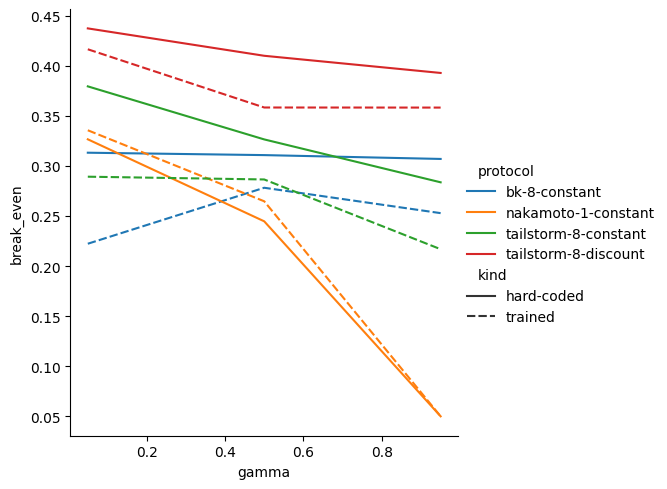

In [3]:
sns.relplot(
    data=be_points,
    kind="line",
    hue="protocol",
    x="gamma",
    y="break_even",
    style="kind",
)

In [4]:
be_points.pivot(index=["protocol"], columns=["kind", "gamma"], values=["break_even"])

break_even                                            \
kind                 hard-coded   trained hard-coded   trained hard-coded   
gamma                      0.05      0.05       0.50      0.50       0.95   
protocol                                                                    
bk-8-constant          0.313128  0.222279   0.310738  0.278139   0.306910   
nakamoto-1-constant    0.326504  0.335526   0.244649  0.264646   0.050000   
tailstorm-8-constant   0.379349  0.289186   0.326400  0.286422   0.283583   
tailstorm-8-discount   0.437211  0.416363   0.409877  0.358253   0.392737   

                                
kind                   trained  
gamma                     0.95  
protocol                        
bk-8-constant         0.252810  
nakamoto-1-constant   0.050000  
tailstorm-8-constant  0.216807  
tailstorm-8-discount  0.358173

In [5]:
gamma = sorted(be_points.gamma.drop_duplicates())
d = be_points.set_index(["protocol", "gamma", "kind"]).break_even
p = {
    "Bitcoin": "nakamoto-1-constant",
    "Constant": "tailstorm-8-constant",
    "Tailstorm": "tailstorm-8-discount",
    "$\\mathcal B_k$": "bk-8-constant",
}


def table0():
    # Header
    print("\\bgroup")
    print("\\newcolumntype{Y}{>{\\centering\\arraybackslash}X}")
    print("\\begin{tabularx}{\\linewidth}{lYYYYYY}")
    print("\\toprule")
    print(
        " & \\multicolumn{3}{c}{Trained Policy} & \\multicolumn{3}{c}{Reference Policy} \\\\"
    )
    print("\\cmidrule(lr){2-4}\\cmidrule(l){5-7}")
    print("$\\gamma$", end="")
    for i in range(2):
        for g in gamma:
            print(f" & {g*100:.0f}\\,\\%", end="")
    print(" \\\\")
    print("\\midrule")
    # Content
    for label, proto in p.items():
        print(f"{label}", end="")
        for k in ["trained", "hard-coded"]:
            for g in gamma:
                a = d.loc[(proto, g, k)] * 100
                if a == 5:
                    print("& {$\leq 5$}", end="")
                else:
                    print(f" & {a:.1f}", end="")
        print(" \\\\")
    print("\\bottomrule")
    print("\\end{tabularx}")
    print("\\egroup")


table0()
with open("break-even.tex", "w") as f:
    with redirect_stdout(f):
        table0()

\bgroup
\newcolumntype{Y}{>{\centering\arraybackslash}X}
\begin{tabularx}{\linewidth}{lYYYYYY}
\toprule
 & \multicolumn{3}{c}{Trained Policy} & \multicolumn{3}{c}{Reference Policy} \\
\cmidrule(lr){2-4}\cmidrule(l){5-7}
$\gamma$ & 5\,\% & 50\,\% & 95\,\% & 5\,\% & 50\,\% & 95\,\% \\
\midrule
Bitcoin & 33.6 & 26.5& {$\leq 5$} & 32.7 & 24.5& {$\leq 5$} \\
Constant & 28.9 & 28.6 & 21.7 & 37.9 & 32.6 & 28.4 \\
Tailstorm & 41.6 & 35.8 & 35.8 & 43.7 & 41.0 & 39.3 \\
$\mathcal B_k$ & 22.2 & 27.8 & 25.3 & 31.3 & 31.1 & 30.7 \\
\bottomrule
\end{tabularx}
\egroup
